In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import warnings
warnings.filterwarnings('ignore')
import sidetable
import statsmodels.api as sm
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats

In [2]:
df = pd.read_csv("datos/bikes.csv", index_col=0)
df.head(6)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606


Eliminamos la columna instant, es un índice. También eliminamos casual y cnt porque nuestra variable respuesta va a ser registered.

In [3]:
lista_columnas = ["instant", "casual", "cnt"]

In [4]:
df.drop(columns= lista_columnas, inplace=True)

In [5]:
def explorar_df(dataframe, nombre = ''):
    """Esta función realiza la exploración inicial de un dataframe dado:
            - Muestra las 5 primeras filas
            - Muestra las 5 últimas filas
            - Muestra 10 filas aleatorias
            - Indica el nº de filas y columnas
            - Muestra el resultado del método .info()
            - Indica el número de nulos por columna en valor absoluto y porcentaje
            - Indica el nº de filas duplicadas. En caso de que no pueda realizar la comprobación muestra un error
            - Muestra los principales estadísticos tanto de las columnas numéricas (si las hay) como de las categóricas (si las hay)
            - Muestra el nombre de las columnas
            - Indica el numero de valores distintos de cada columna y muestra los valores cuando sean 15 o menos
        Parámetros:
            - dataframe (pandas.core.frame.DataFrame): dataframe que se requiere explorar
            - nombre (str): nombre del dataframe a explorar. Parámetro por defecto con valor '' para que si n o se le quiere poner un nombre al dataframe
              la exploración pueda continuar.
        Return: None.
    """
    print(f'EXPLORACIÓN DEL DATAFRAME {nombre.upper()}')
    print('---------------------------------------------------------------------------')
    print(f'Las primeras 5 filas del dataframe {nombre} son:')
    display(dataframe.head())
    print('---------------------------------------------------------------------------')
    print(f'Las últimas 5 filas del dataframe {nombre} son:')
    display(dataframe.tail())
    print('---------------------------------------------------------------------------')
    print(f'A comntinuación se muestran 10 filas aleatorias del dataframe {nombre}:')
    display(dataframe.sample(10))
    print('---------------------------------------------------------------------------')
    print(f'El dataframe {nombre} tiene {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas')
    print('---------------------------------------------------------------------------')
    print('A continuación el resultado del método .info() incluyendo los tipos de dato de cada columna:')
    dataframe.info()
    print('---------------------------------------------------------------------------')
    print('El número de nulos por columna en valor absoluto y porcentaje es:')
    for i, col in enumerate(dataframe.isnull().sum()):
        print(f'{dataframe.isnull().sum().index[i]}: nº de nulos: {col}. % de nulos: {round(col/dataframe.shape[0]*100, 2)} %')
    print('---------------------------------------------------------------------------')
    try:
        print(f'El nº de filas duplicadas del dataframe {nombre} es: {df.duplicated().sum()}')
    except:
        print(f'Ha ocurrido un error. No se ha podido comprobar si el dataframe {nombre} tiene filas duplicdas')
    print('---------------------------------------------------------------------------')
    if dataframe.select_dtypes(include=np.number).shape[1] != 0:
        print(f'Los principales estadísticos de las columnas numéricas son:')
        display(dataframe.describe().T)
    print('---------------------------------------------------------------------------')
    if dataframe.select_dtypes(exclude=np.number).shape[1] != 0:
        print(f'Los principales estadísticos de las columnas categóricas son:')
        display(dataframe.describe(include=object).T)
    print('---------------------------------------------------------------------------')
    print(f'El dataframe {nombre} tiene las siguientes columnas: \n{dataframe.columns}')
    print('---------------------------------------------------------------------------')
    print('El numero de valores distintos de cada columna es:')
    for col in dataframe.columns:
        if len(dataframe[col].value_counts()) > 15:
            print(f'{col}: {len(dataframe[col].value_counts())}')
        else:
            print(f'{col}: {len(dataframe[col].value_counts())}')
            print(f'Los valores únicos de la columna “{col}” son: {dataframe[col].unique()}')

In [6]:
explorar_df(df, "bikes")

EXPLORACIÓN DEL DATAFRAME BIKES
---------------------------------------------------------------------------
Las primeras 5 filas del dataframe bikes son:


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
0,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,654
1,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,670
2,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1229
3,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1454
4,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1518


---------------------------------------------------------------------------
Las últimas 5 filas del dataframe bikes son:


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
725,27-12-2019,spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,1867
726,28-12-2019,spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,2451
727,29-12-2019,spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1182
728,30-12-2019,spring,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1432
729,31-12-2019,spring,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,2290


---------------------------------------------------------------------------
A comntinuación se muestran 10 filas aleatorias del dataframe bikes:


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
713,15-12-2019,winter,1,12,0,6,0,1,13.290847,16.91915,65.0417,7.125450,4280
410,15-02-2019,spring,1,2,0,3,1,1,14.281653,17.58145,53.1250,12.167200,4028
244,02-09-2018,autumn,0,9,0,5,1,2,26.376653,30.24040,72.7083,9.375243,3852
150,31-05-2018,summer,0,5,0,2,1,1,31.775000,36.26915,63.6667,7.459043,3309
536,21-06-2019,autumn,1,6,0,4,1,1,33.039153,37.62710,56.7917,7.958729,5127
654,17-10-2019,winter,1,10,0,3,1,1,18.689153,22.50540,69.2917,6.791857,6482
346,13-12-2018,winter,0,12,0,2,1,1,11.582500,15.05690,59.0000,9.416850,3368
436,13-03-2019,spring,1,3,0,2,1,1,23.165000,27.14645,61.7500,15.875650,5085
28,29-01-2018,spring,0,1,0,6,0,1,8.057402,10.60630,65.1739,9.739455,975
319,16-11-2018,winter,0,11,0,3,1,3,18.723347,22.59940,93.0000,9.167543,1672


---------------------------------------------------------------------------
El dataframe bikes tiene 730 filas y 13 columnas
---------------------------------------------------------------------------
A continuación el resultado del método .info() incluyendo los tipos de dato de cada columna:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  registered  730 non-nu

,count,mean,std,min,25%,50%,75%,max
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021


---------------------------------------------------------------------------
Los principales estadísticos de las columnas categóricas son:


,count,unique,top,freq
dteday,730,730,01-01-2018,1
season,730,4,autumn,188


---------------------------------------------------------------------------
El dataframe bikes tiene las siguientes columnas: 
Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'registered'],
      dtype='object')
---------------------------------------------------------------------------
El numero de valores distintos de cada columna es:
dteday: 730
season: 4
Los valores únicos de la columna “season” son: ['spring' 'summer' 'autumn' 'winter']
yr: 2
Los valores únicos de la columna “yr” son: [0 1]
mnth: 12
Los valores únicos de la columna “mnth” son: [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday: 2
Los valores únicos de la columna “holiday” son: [0 1]
weekday: 7
Los valores únicos de la columna “weekday” son: [6 0 1 2 3 4 5]
workingday: 2
Los valores únicos de la columna “workingday” son: [0 1]
weathersit: 3
Los valores únicos de la columna “weathersit” son: [2 1 3]
temp: 498
atemp: 689
hum: 594
windsp

In [7]:
columnas_numericas = ["weathersit", "temp", "atemp", "hum", "windspeed", "registered"]

# Detectamos outliers

In [8]:
columnas_numericas2 = ["weathersit", "temp",  "hum", "windspeed"]

In [9]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [10]:
ind = detectar_outliers(columnas_numericas2, df)

In [11]:
print(ind)
valores = ind.values()
print(valores)
valores = {indice for sublista in valores for indice in sublista}
print(valores)

{'hum': [49, 68], 'windspeed': [44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720]}
dict_values([[49, 68], [44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720]])
{449, 382, 68, 292, 420, 44, 431, 432, 49, 720, 407, 665, 93, 94}


In [12]:
len(valores)

14

Tenemos 14 outliers.

In [13]:
df.sample(3)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
592,16-08-2019,autumn,1,8,0,4,1,1,29.485847,32.73440,51.9167,9.500332,6267
322,19-11-2018,winter,0,11,0,6,0,1,13.495847,16.22415,50.2083,15.041232,2720
162,12-06-2018,summer,0,6,0,0,0,1,28.392500,32.16625,74.7917,10.958989,2993


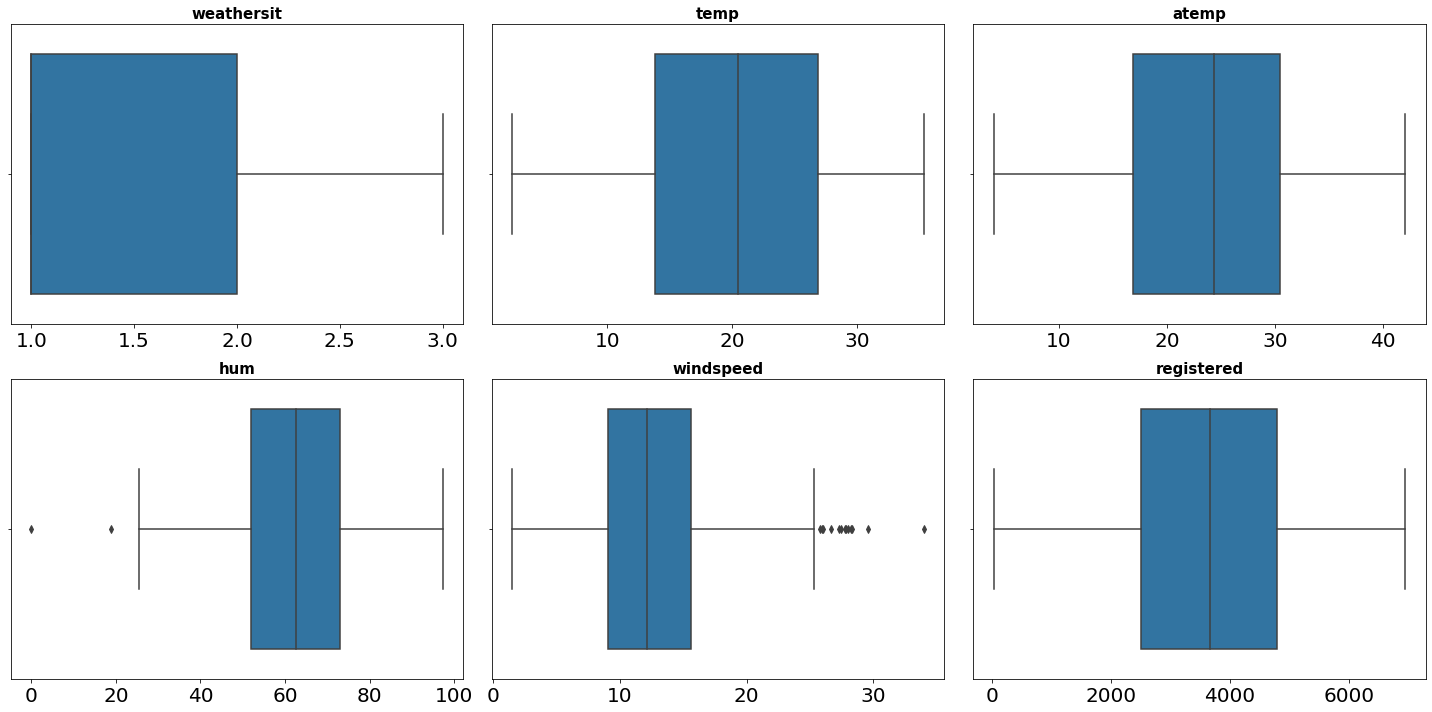

In [14]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10))
axes = axes.flat
for i, colum in enumerate(columnas_numericas):
    sns.boxplot(data = df,
                x = colum,
                ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
fig.tight_layout();

In [15]:
df.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
0,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,654
1,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,670


In [16]:
lista_festivos = ['01-01-2018', '01-01-2019', '19-02-2018', '18-02-2019', '15-01-2018', '21-01-2019', 
                  '16-04-2018', '16-04-2019', '28-05-2018', '27-05-2019', '04-07-2018', '04-07-2019',
                  '03-09-2018', '02-09-2019', '08-09-2018', '14-09-2019', '12-11-2018', '11-11-2019',
                  '22-11-2018', '28-11-2019', '25-12-2018', '25-12-2019']

In [17]:
def festivos (fecha):
    
    if fecha in lista_festivos:
        return 1
    
    else:
        return 0
    
df['holiday'] = df['dteday'].apply(festivos)

In [18]:
df.sample(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
637,30-09-2019,winter,1,9,0,0,0,1,21.593347,25.88315,58.3333,9.042186,4874
576,31-07-2019,autumn,1,7,0,2,1,1,29.246653,33.14480,70.4167,11.083475,6248
178,28-06-2018,autumn,0,6,0,2,1,1,30.510847,34.62790,63.4167,9.666961,3916
466,12-04-2019,summer,1,4,0,4,1,1,16.297500,19.38020,46.6250,19.458743,4746
68,10-03-2018,spring,0,3,0,4,1,3,15.952731,19.28340,0.0000,17.545759,577
420,25-02-2019,spring,1,2,0,6,0,1,11.924153,12.78375,39.5833,28.250014,2415
726,28-12-2019,spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,2451
184,04-07-2018,autumn,0,7,1,1,0,2,29.793347,33.27085,63.7917,5.459106,2978
681,13-11-2019,winter,1,11,0,2,1,2,14.076653,16.16125,66.2917,22.917082,3767
429,06-03-2019,spring,1,3,0,2,1,1,10.591653,12.75210,45.6667,13.458625,3735


In [19]:
df['dteday'] = pd.to_datetime(df['dteday'], format = '%d-%m-%Y')

explorar estaciones quizá usando un map

procedemos a cambiar los días de la semana

Observamos que las estaciones están adelantadas, podemos usar un .map para corregir manualmente este desajuste temporal 

In [20]:
mapa_estaciones = {
    'spring':'winter',
    'winter': 'autumn',
    'autumn': 'summer',
    'summer':'spring'
}

In [21]:
df["season"] = df["season"].map(mapa_estaciones, na_action="ignore")

In [22]:
df["weekday"] = df["dteday"].dt.day_name()

Cambiamos los valores de holiday y working day

In [23]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
0,2018-01-01,winter,0,1,1,Monday,0,2,14.110847,18.18125,80.5833,10.749882,654
1,2018-01-02,winter,0,1,0,Tuesday,0,2,14.902598,17.68695,69.6087,16.652113,670
2,2018-01-03,winter,0,1,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1229
3,2018-01-04,winter,0,1,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,1454
4,2018-01-05,winter,0,1,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,1518


In [24]:
def working (col1, col2): 
    
    
    if col1 in ["Saturday", "Sunday"] or col2 == 1:
        return  0
    else:
        return 1
    
df['workingday'] = df.apply(lambda x: working(x['weekday'], x['holiday']), axis= 1)

In [25]:
df.sample(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
287,2018-10-15,autumn,0,10,0,Monday,1,1,20.773347,24.93625,48.3333,17.291561,3318
435,2019-03-12,winter,1,3,0,Tuesday,1,1,19.133347,22.97960,48.9167,13.916771,4460
567,2019-07-22,summer,1,7,0,Monday,1,2,27.367500,31.15625,76.2500,6.292694,4866
203,2018-07-23,summer,0,7,0,Monday,1,1,34.815847,40.21435,50.0000,8.791807,2298
634,2019-09-27,autumn,1,9,0,Friday,1,2,26.650000,30.39875,69.0833,9.000914,6642
112,2018-04-23,spring,0,4,0,Monday,1,2,18.860000,22.50605,88.7917,15.458575,2574
13,2018-01-14,winter,0,1,0,Sunday,0,1,6.595670,9.42065,53.7826,8.478716,1367
378,2019-01-14,winter,1,1,0,Monday,1,1,7.380000,9.15435,45.7500,12.541261,2160
194,2018-07-14,summer,0,7,0,Saturday,0,1,27.914153,31.75520,47.6250,16.124689,4196
300,2018-10-28,autumn,0,10,0,Sunday,0,2,13.564153,15.94060,58.5833,15.375093,3291


Usar day_name para cambiar numérico a nominal 

Creamos un heatmap de correlaciones

In [26]:
df_numericas = df.select_dtypes(include = np.number )

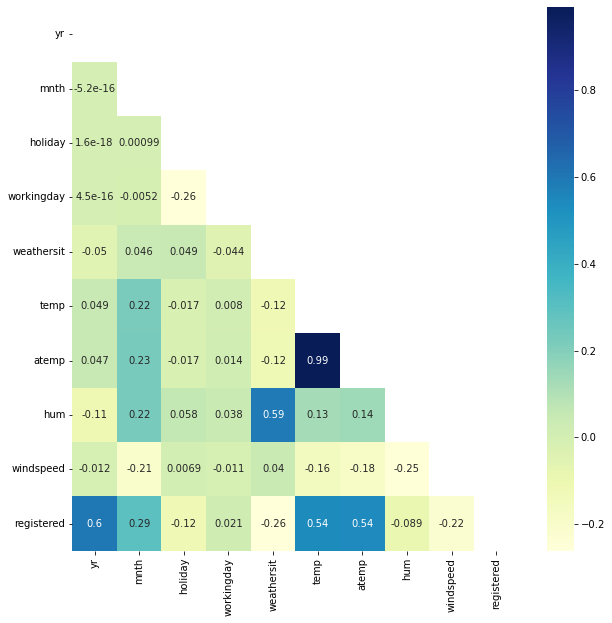

In [27]:
plt.figure(figsize= (10,10)) 
mask = np.triu(np.ones_like(df_numericas.corr(), dtype=np.bool_))
sns.heatmap(df_numericas.corr(),
            cmap = "YlGnBu", 
            mask = mask, # incorporamos la máscara en nuestro plot
           annot = True);

In [28]:
df.drop('atemp', axis = 1, inplace = True)

In [29]:
df.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered
0,2018-01-01,winter,0,1,1,Monday,0,2,14.110847,80.5833,10.749882,654
1,2018-01-02,winter,0,1,0,Tuesday,1,2,14.902598,69.6087,16.652113,670


Quitamos atemp por ser redundante con temp

Sacamos el boxplot para visualizar si cambia el número de usuarios y fijarnos en la mediana

In [30]:
lista_categoricas = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

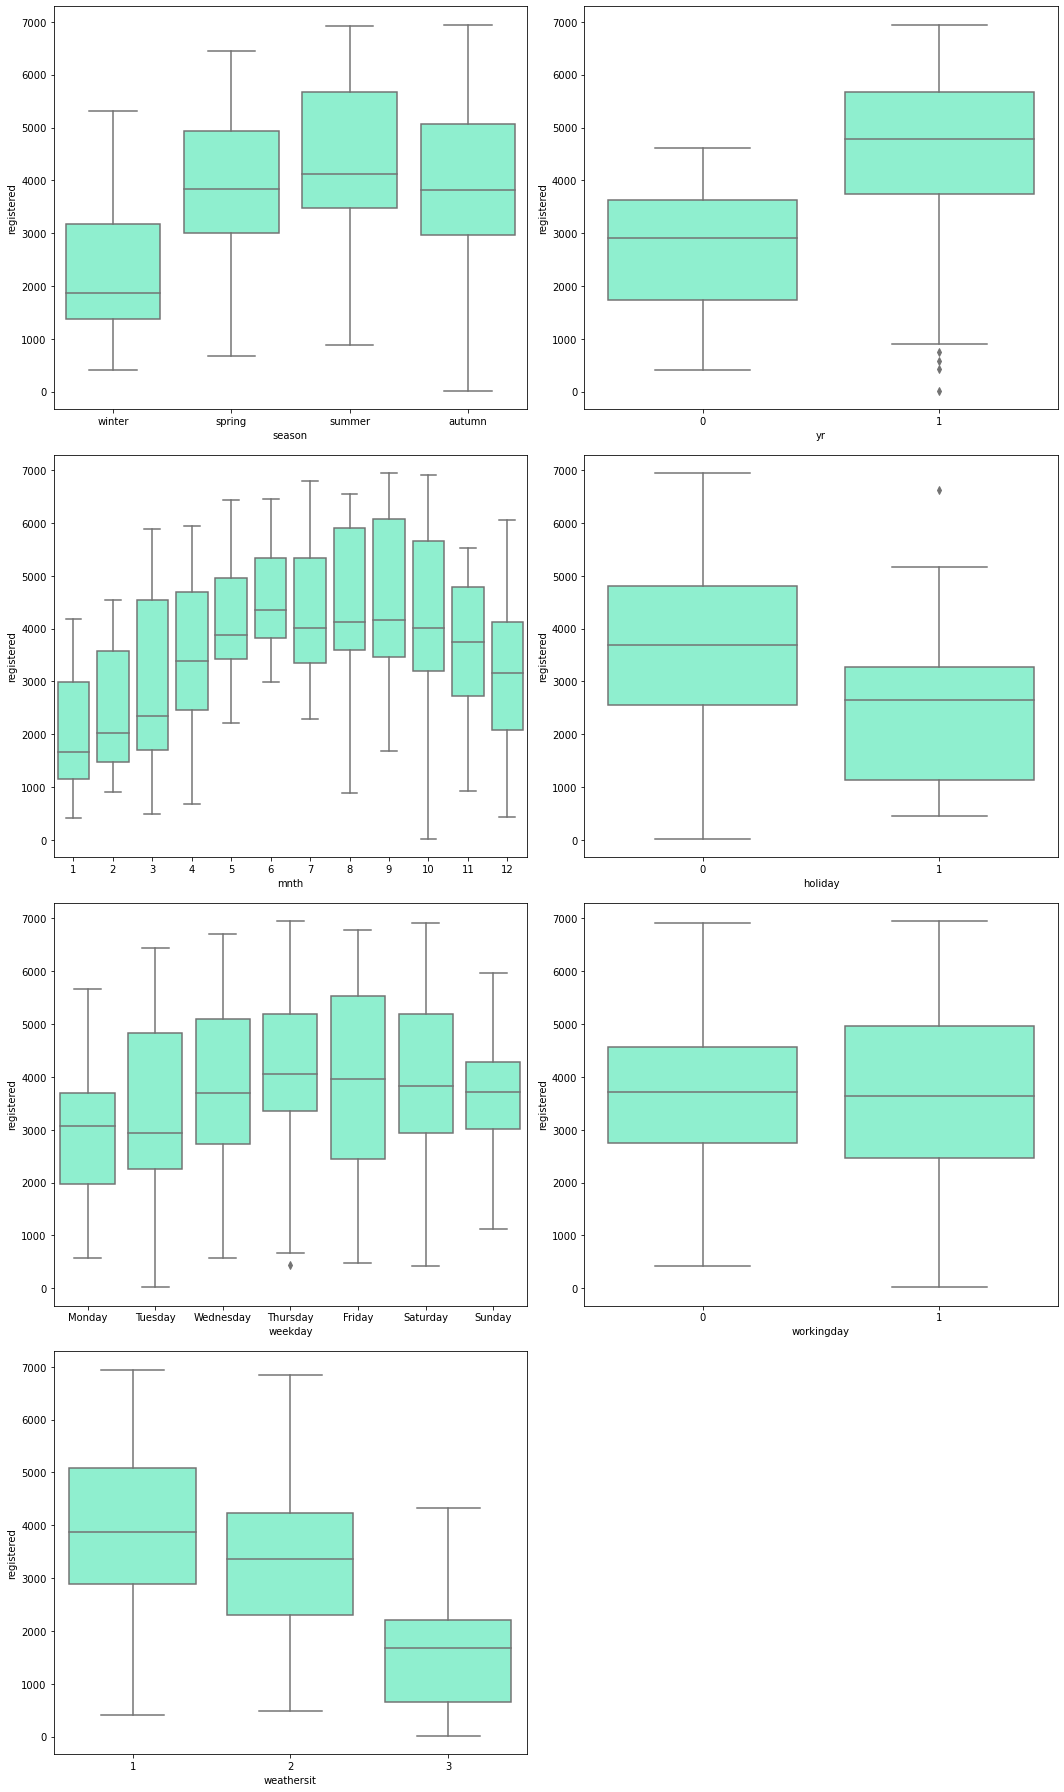

In [31]:
fig, axes = plt.subplots(4, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(lista_categoricas):
    sns.boxplot(x = columna, y = 'registered' , data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

In [32]:
df['weathersit'].unique()

array([2, 1, 3])

In [33]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered
0,2018-01-01,winter,0,1,1,Monday,0,2,14.110847,80.5833,10.749882,654
1,2018-01-02,winter,0,1,0,Tuesday,1,2,14.902598,69.6087,16.652113,670
2,2018-01-03,winter,0,1,0,Wednesday,1,1,8.050924,43.7273,16.636703,1229
3,2018-01-04,winter,0,1,0,Thursday,1,1,8.200000,59.0435,10.739832,1454
4,2018-01-05,winter,0,1,0,Friday,1,1,9.305237,43.6957,12.522300,1518


In [34]:
df.to_csv("datos/bikes_EDA.csv")